In [3]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the data
file_path = "./dataset/titanic/train.csv"
df = pd.read_csv(file_path)

In [13]:
print(f"Shape: {df.shape}")
print(f"Size: {df.size}")

print("List of columns:")
print(df.columns)
print(df.dtypes)

Shape: (891, 12)
Size: 10692
List of columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Distinguishing categorical and numerical columns

In [14]:
# distinguishing categorical and numerical column

dict = df.dtypes.to_dict().items()
cat_col = []
num_col = []
for key, value in dict:
    if (value == "O"):
        cat_col.append(key)
    else:
        num_col.append(key)
print("-------------------- categorical column --------------------")        
print(cat_col)
print("-------------------- numerical column --------------------")
print(num_col)

-------------------- categorical column --------------------
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
-------------------- numerical column --------------------
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [15]:
dict = df.dtypes.to_dict().items()
cat = [key for key, value in dict if value == 'O']
num = [key for key, value in dict if value != 'O']
print("Categorical Columns: ")
print(cat)
print("Numerical Columns: ")
print(num)

Categorical Columns: 
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: 
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Analysing the age value for imputation

In [19]:
df_male = df[df['Sex']=='male']
df_female = df[df['Sex']=='female']
print("Male Min Age: " ,df_male['Age'].min())
print("Male Max Age: " ,df_male['Age'].max())
print("--------------------------------------------")
print("Female Min Age: " ,df_female['Age'].min())
print("Female Max Age: " ,df_female['Age'].max())

Male Min Age:  0.42
Male Max Age:  80.0
--------------------------------------------
Female Min Age:  0.75
Female Max Age:  63.0


In [20]:
male_stats = df[df['Sex']=="male"]['Age'].describe()
female_stats = df[df['Sex']=="female"]['Age'].describe()
print("Male Stats: ")
print(male_stats)
print("--------------------------------------------")
print("Female Stats")
print(female_stats)

Male Stats: 
count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64
--------------------------------------------
Female Stats
count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64


In [21]:
age_median = df['Age'].median()
df.fillna({"Age": age_median}, inplace=True)

In [22]:
# Since there are alot of missing values in the Cabin column, for not it's not insightful

df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [25]:
# Dropping the cabin column as the missing value > 77% and not insightful data.
df.drop('Cabin', axis=1, inplace=True)
print("Cabin column dropped")

Cabin column dropped


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
# Gender Count

# Total Male
total_male = df[df['Sex'] == "male"]
print("Total Male:", len(total_male))

# Total Female
total_female = df[df['Sex'] == "female"]
print("Total Female:", len(total_female))

Total Male: 577
Total Female: 314


In [30]:
### getting the survival based on gender

con1 = df['Survived'] == 1
con2 = df['Sex'] == "male"
con3 = df['Sex'] == "female"
con4 = df['Survived'] == 0
# children
con5 = df['Age'] < 16
# df male survival
df_male_sur = df[con1&con2]
# df female survival
df_female_sur = df[con1&con3]
# df male death
df_male_death = df[con2&con4]
# df female death
df_female_death = df[con3&con4]

print(f"Total Male survived: {len(df_male_sur)}")
print(f"Total Female survived: {len(df_female_sur)}")
print(f"Total Male Death : {len(df_male_death)}")
print(f"Total Female Death: {len(df_female_death)}")

Total Male survived: 109
Total Female survived: 233
Total Male Death : 468
Total Female Death: 81


In [33]:
# Total Children
age_group = 18

total_children = len(df[df['Age'] < age_group])
print("No. of total childrens: ", total_children)
total_childrens_survived = len(df[con1&con5])
print("Total childrens survived: ", total_childrens_survived)
total_childrens_death = len(df[con4&con5])
print("Total childrens death: ", total_childrens_death)

No. of total childrens:  113
Total childrens survived:  49
Total childrens death:  34


In [35]:
233/314

0.7420382165605095

#### Insights from above

- Total Passengers = 891
- Total Male = 577
- Total Female = 314
- Total Male Survived and Died: Out of 577 only 109 survived
- Total Female Survived: Out of 314, 233 survived.
- Out of 891 passengers 113 passengers where childrens under age 18 and only 61 were able to survive and 52 coudn't made it.
- The the survival rate of women are twice as men.
- Almost half of amongst the childrens were not able to survive.


In [36]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Cols")
print(categorical_cols)
print("Numerical Cols")
print(numerical_cols)


Categorical Cols
['Name', 'Sex', 'Ticket', 'Embarked']
Numerical Cols
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


#### Some Visualizations

#### Bar plot of gender count

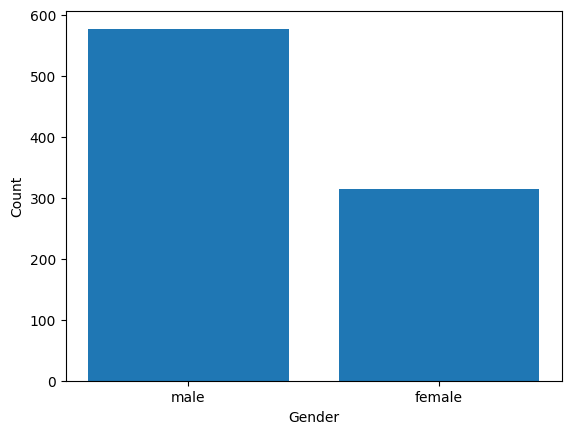

In [ ]:
gender_values = df['Sex'].value_counts()
sex = gender_values.index
count = gender_values.values

df_sex = pd.DataFrame(zip(sex, count), columns=['sex', 'count'])
plt.bar("sex", "count", data=df_sex)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### Bar Plot of Survival

In [151]:
survival_stats = df['Survived'].value_counts()
dict_sur = survival_stats.to_dict()

dict_sur['Not Survived'] = dict_sur.pop(0)
dict_sur['Survived'] = dict_sur.pop(1)

df_sur = pd.DataFrame(dict_sur.items(), columns=['Status', 'Count'])
df_sur

,Status,Count
0,Not Survived,549
1,Survived,342


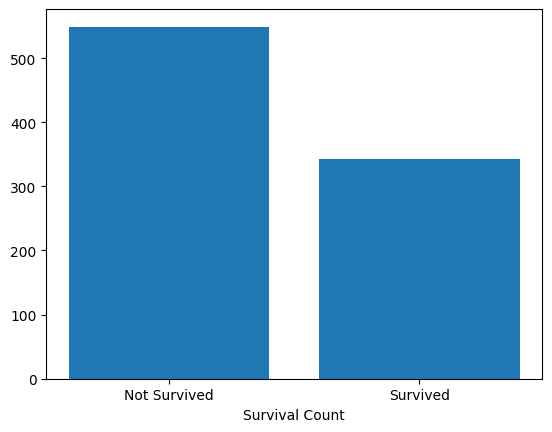

In [156]:

plt.bar('Status', 'Count', data=df_sur)
plt.xlabel("Survival Status")
plt.xlabel("Survival Count")
plt.show()

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
